In [0]:
import tensorflow as tf
tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [0]:
mnist = tf.keras.datasets.mnist

(x_train,y_train) ,(x_test,y_test)=mnist.load_data()  #28*28 images of hand written digits 0-9

#normalising image
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

#model architecture
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #o/p layer for 10 classes , softmax->probablity distribution

#model training
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])     #Neural Networks doesn't work for acurracy rather lessening loss 
model.fit(x_train,y_train ,epochs =3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9250
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0751 - accuracy: 0.9762


In [0]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9636
0.11566073447465897 0.9635999798774719


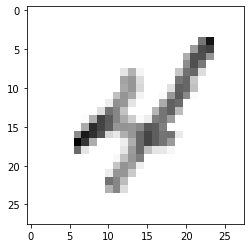

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9],cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [0]:
model.save('digit_recogn.model')


INFO:tensorflow:Assets written to: digit_recogn.model/assets


In [0]:
new_model=tf.keras.models.load_model('digit_recogn.model') #save model 

In [0]:
predictions = new_model.predict(x_test)
   #load model 

In [0]:
print(predictions)

[[5.20052845e-09 2.87161028e-09 3.58081479e-07 ... 9.99968648e-01
  7.81754128e-09 7.32363958e-07]
 [9.98040192e-11 7.35476942e-06 9.99992609e-01 ... 3.29006371e-11
  1.10504068e-08 1.36217526e-14]
 [2.70472515e-06 9.99483824e-01 9.29213929e-05 ... 8.62060042e-05
  2.32678984e-04 2.33424862e-06]
 ...
 [6.33564454e-08 2.63455547e-07 2.22014776e-07 ... 5.85054613e-06
  2.96791550e-05 6.76414638e-05]
 [2.65829385e-05 1.18951235e-07 4.07096923e-06 ... 3.69284066e-07
  2.04313104e-03 4.55827305e-08]
 [1.07583993e-07 4.90194285e-09 6.75405147e-07 ... 1.02584392e-10
  2.86935915e-08 2.25913177e-10]]


In [0]:
import numpy as np
print(np.argmax(predictions[12]))

9


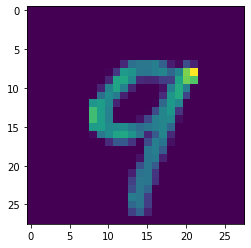

In [0]:
plt.imshow(x_test[12])
plt.show()